In [1]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots. 
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [88]:
# load the bert embeddings
embeddings1 = np.load('chunk_1/embs_chunk_1.npy')
#embeddings2 = np.load('chunk_2/embs_chunk_2.npy')
# load the codes
with open('chunk_1/icd_codes_chunk_1.txt', 'rt') as file:
    codes1 = [line.strip('\n').split(';') for line in file.readlines()]
#with open('chunk_2/icd_codes_chunk_2.txt', 'rt') as file:
#    codes2 = [line.strip('\n').split(';') for line in file.readlines()]

embeddings = embeddings1 #np.concatenate((embeddings1, embeddings2))
codes = codes1 #+ codes2

# convert the list to numpy array
codes = [np.array(_) for _ in codes]

# remove Z12.11
codes = [code[code != 'Z12.11'] for code in codes]
    

In [89]:
# flatten the codes to get the code distribution
codes_flat = np.concatenate(codes)
# extract the unique codes with their respective counts
codes_uniq, counts = np.unique(codes_flat, return_counts=True)
# sort the counts in descending order
sorted_indices = np.argsort(counts)[::-1]
# display the top frequent codes with counts.
for code, count in zip(codes_uniq[sorted_indices[:10]], counts[sorted_indices[:10]]):
    print (code, count)

K57.30 5706
Z86.010 4129
K63.5 4106
K64.8 3165
M54.50 2780
K44.9 2622
K40.90 2592
D12.3 2222
Z41.1 2082
K31.89 2056


In [159]:
SELECTED_CODE = "K57.30"

In [160]:
print("# total data points:", len(embeddings))
data = list(filter(lambda x: np.argwhere(np.array(x[1])==SELECTED_CODE).shape[0] > 0 and len(x[1])==2, zip(embeddings, codes)))
print("# data points:", len(data))

# total data points: 99491
# data points: 846


In [161]:
X = np.array([x[0] for x in data])
y = [x[1] for x in data]


In [195]:
tsne = TSNE(n_components=2, random_state=13, n_jobs=8, metric='l2') # l1, l2, braycurtis, cosine, euclidean, chebyshev,correlation, nan_euclidean, 
X_proj = tsne.fit_transform(X)

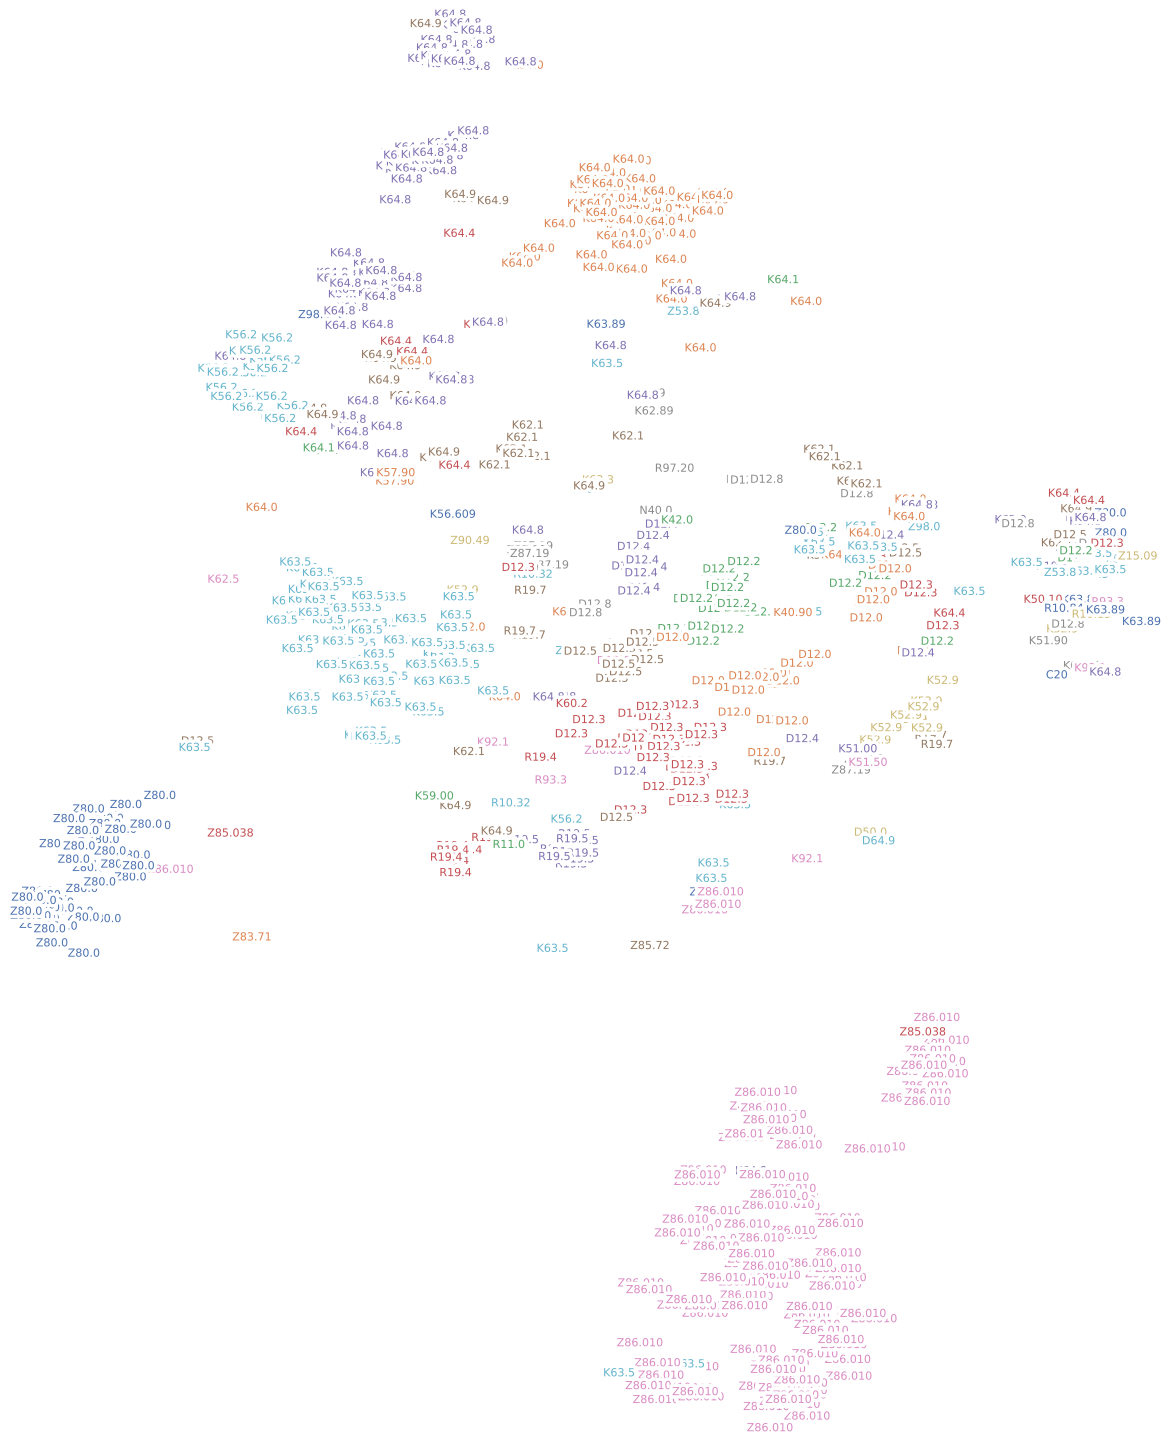

In [196]:
colors = np.array([len(_) for _ in y])
yprime = ["_".join(p[p!=SELECTED_CODE]) for p in y]

yp_uniq = np.unique(yprime)
yp_uniq_dict = {c[1]:c[0] for c in enumerate(yp_uniq)}

# We choose a color palette with seaborn.
palette = np.array(sns.color_palette("deep", len(yp_uniq)))

    # We create a scatter plot.
f = plt.figure(figsize=(10, 10))
ax = plt.subplot(aspect='equal')
#sc = ax.scatter(X_proj[:,0], X_proj[:,1], lw=0, s=30,
#                c=palette[colors.astype(int)])

plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

for i, x in enumerate(X_proj):
    txt = ax.text(x[0], x[1], yprime[i], fontsize=8, c = palette[yp_uniq_dict[yprime[i]]])
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="w"),
        PathEffects.Normal()])
